<a href="https://colab.research.google.com/github/truly-likhith/AUTO_LOGIN/blob/master/COVID_19_FACE_MASK_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import os
os.environ['KAGGLE_USERNAME']='likhithsaiandra'
os.environ['KAGGLE_KEY']='8e37be58575d5e1f9c0d736ca46d08b2'

In [24]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 96% 199M/207M [00:01<00:00, 115MB/s]
100% 207M/207M [00:01<00:00, 116MB/s]


In [28]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [29]:
main_dir = '/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
validation_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_no_mask_dir=os.path.join(train_dir,'Non Mask')

In [30]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_no_mask_names = os.listdir(train_no_mask_dir)
print(train_no_mask_names[:10])

['1280.jpg', '0934.png', '0773.jpg', '1558.png', '0582.jpg', '1560.jpg', '0837.jpg', '1037.png', '0414.jpg', '0243.jpg']
['172.jpg', '26.jpg', '124.jpg', '220.jpg', '139.jpg', '129.jpg', '298.jpg', '97.jpg', '280.jpg', '281.jpg']


['/content/New Masks Dataset/Train/Mask/1280.jpg', '/content/New Masks Dataset/Train/Mask/0934.png', '/content/New Masks Dataset/Train/Mask/0773.jpg', '/content/New Masks Dataset/Train/Mask/1558.png', '/content/New Masks Dataset/Train/Mask/0582.jpg', '/content/New Masks Dataset/Train/Mask/1560.jpg', '/content/New Masks Dataset/Train/Mask/0837.jpg', '/content/New Masks Dataset/Train/Mask/1037.png']
['/content/New Masks Dataset/Train/Non Mask/172.jpg', '/content/New Masks Dataset/Train/Non Mask/26.jpg', '/content/New Masks Dataset/Train/Non Mask/124.jpg', '/content/New Masks Dataset/Train/Non Mask/220.jpg', '/content/New Masks Dataset/Train/Non Mask/139.jpg', '/content/New Masks Dataset/Train/Non Mask/129.jpg', '/content/New Masks Dataset/Train/Non Mask/298.jpg', '/content/New Masks Dataset/Train/Non Mask/97.jpg']


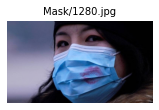

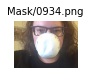

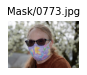

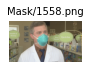

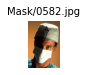

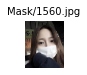

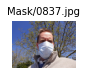

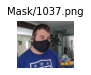

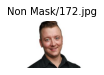

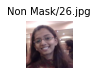

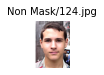

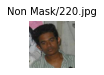

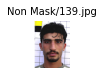

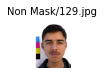

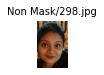

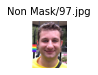

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
n_rows=4
n_cols=4
plt.figure(figsize=(12,12))
# mask pic list
mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
# non_mask_pic list
no_mask_pic=[]
for i in train_no_mask_names[0:8]:
  no_mask_pic.append(os.path.join(train_no_mask_dir,i))
#print the mask and no mask
print(mask_pic)
print(no_mask_pic)
#print the merged list
merged_list=mask_pic+no_mask_pic
for i in range(0,len(merged_list)):
  # we dont want full file or location we just want 0241.jpg etc... images ending is needed
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(n_rows,n_cols,i+1)
  sp.axis('Off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  plt.show()

In [32]:
## DATA AGUMENTATION
# If the data is slightly deviated from the model of training it leads to overfitting example if a cat turns right in all pictures
# then if a unknow pic from data gives left faced cat then model gives wrong output 
# hence we need to used "ImagedDataGenerator" 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trian_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#target_size which is we want 150*150pixels
# batch_size is we are feeding 32 pics at a time
train_generator = trian_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')
vadlidation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [33]:
# to find which classes it found then
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [34]:
train_generator.image_shape

(150, 150, 3)

In [35]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.layers import Dropout


In [36]:
from keras.models import Sequential
model = Sequential()
# filter size 32 different filters and size of the filter (3,3) and padding same
# 1st conv layer
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd conv layer

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#convert to flatten the layer
model.add(Flatten())

#dense the layer at last
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
# since we are dealing with binary classification 1 node is enough
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [37]:
from tensorflow.keras.optimizers import Adam


In [38]:
# since we have two features yes or no so binary cross entropy else it would be categorical entropy
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
# train the model
history = model.fit(train_generator,epochs=30,validation_data=vadlidation_generator)

Epoch 1/30
19/19 [==============================] - 45s 655ms/step - loss: 5.1289 - accuracy: 0.5241 - val_loss: 0.6925 - val_accuracy: 0.6209
Epoch 2/30
19/19 [==============================] - 12s 618ms/step - loss: 0.6694 - accuracy: 0.5755 - val_loss: 0.6698 - val_accuracy: 0.7418
Epoch 3/30
19/19 [==============================] - 12s 622ms/step - loss: 0.5298 - accuracy: 0.7621 - val_loss: 0.5959 - val_accuracy: 0.7712
Epoch 4/30
19/19 [==============================] - 12s 613ms/step - loss: 0.4574 - accuracy: 0.7940 - val_loss: 0.5017 - val_accuracy: 0.8497
Epoch 5/30
19/19 [==============================] - 12s 616ms/step - loss: 0.4247 - accuracy: 0.8268 - val_loss: 0.4295 - val_accuracy: 0.8791
Epoch 6/30
19/19 [==============================] - 12s 620ms/step - loss: 0.3058 - accuracy: 0.8851 - val_loss: 0.3411 - val_accuracy: 0.9216
Epoch 7/30
19/19 [==============================] - 12s 618ms/step - loss: 0.2891 - accuracy: 0.8822 - val_loss: 0.3757 - val_accuracy: 0.9085

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

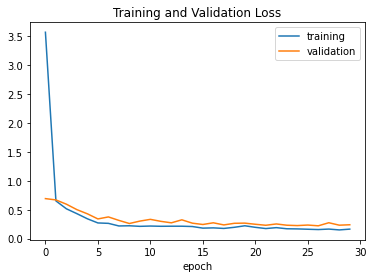

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
# if loss is down and training is up then model is good else bad

Text(0.5, 0, 'epoch')

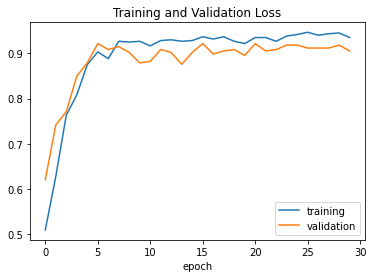

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
# if loss is down and training is up then model is good else bad

#overfitting ? --> it hapens when validation loss increases and training decreases leads to over fitting

In [43]:
# find the accuracy how it evaluates the data
test_loss,test_acc = model.evaluate(test_generator)
print('test_loss:{} test_acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 1s 308ms/step - loss: 0.2023 - accuracy: 0.9400
test_loss:0.20230479538440704 test_acc:0.9399999976158142


In [45]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
# lets us upload images from files and iterate all the images
for fname in uploaded.keys():
  img_path='/content/'+fname
  img=image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  #np.expand_dims which increases the size of the array
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print("MASK")
  else:
    print("NO MASK")

Saving hu,an.jfif to hu,an (1).jfif
Saving masky.jpg to masky.jpg
hu,an.jfif
NO MASK
masky.jpg
MASK
